Imports

In [36]:
import numpy as np
import pandas as pd

Loading the ratings csv file

In [37]:
df_ratings = pd.read_csv("datasets/ratings_small.csv")

In [38]:
df_ratings.shape

(100004, 4)

In [39]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Loading the Movies metadata csv file

In [40]:
df_movies = pd.read_csv("datasets/movies_metadata.csv")

C:\Users\nadav\AppData\Local\Temp\ipykernel_7872\3047610672.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies = pd.read_csv("datasets/movies_metadata.csv")


In [41]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [42]:
df_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


Merging the dataframe to keep userId, movieId, rating and title data

In [43]:
df_movies.drop(df_movies.index[19730],inplace=True)
df_movies.drop(df_movies.index[29502],inplace=True)
df_movies.drop(df_movies.index[35585],inplace=True)

In [44]:
df_movies.id = df_movies.id.astype(np.int64)

In [45]:
type(df_movies.id[0])

numpy.int64

In [46]:
df_ratings.movieId.isin(df_movies.id).sum()

44989

In [47]:
ratings_df = pd.merge(df_ratings,df_movies[['title','id']],left_on='movieId',right_on='id')
ratings_df.head()

,userId,movieId,rating,timestamp,title,id
0,1,1371,2.5,1260759135,Rocky III,1371
1,4,1371,4.0,949810302,Rocky III,1371
2,7,1371,3.0,851869160,Rocky III,1371
3,19,1371,4.0,855193404,Rocky III,1371
4,21,1371,3.0,853852263,Rocky III,1371


In [48]:
ratings_df.drop(['timestamp','id'],axis=1,inplace=True)

In [49]:
ratings_df.shape

(44994, 4)

In [50]:
ratings_df.sample(5)

,userId,movieId,rating,title
28722,199,2288,5.0,Closer
14539,115,231,4.5,Syriana
35336,319,553,3.0,Dogville
29085,165,2617,3.5,The Great Outdoors
11268,311,1282,3.0,Dogtown and Z-Boys


In [51]:
ratings_df.isnull().sum()

userId     0
movieId    0
rating     0
title      0
dtype: int64

Number of ratings for each movie

In [52]:
count_ratings = ratings_df.groupby(by="title")['rating'].count().reset_index().rename(columns={'rating':'totalRatings'})[['title','totalRatings']]

Number of unique movies in the ratings_count dataframe

In [53]:
count_ratings.shape[0]

2794

Checking if the number is correct

In [54]:
len(ratings_df['title'].unique())

2794

In [55]:
count_ratings.sample(5)

,title,totalRatings
83,A Real Young Girl,2
790,Flashdance,26
963,Holy Lola,2
501,Closer,33
539,Crossing Delancey,1


In [56]:
count_ratings.head()

,title,totalRatings
0,!Women Art Revolution,2
1,'Gator Bait,1
2,'Twas the Night Before Christmas,2
3,...And God Created Woman,1
4,00 Schneider - Jagd auf Nihil Baxter,2


In [57]:
ratings_df.head()

,userId,movieId,rating,title
0,1,1371,2.5,Rocky III
1,4,1371,4.0,Rocky III
2,7,1371,3.0,Rocky III
3,19,1371,4.0,Rocky III
4,21,1371,3.0,Rocky III


In [58]:
total_ratings = pd.merge(ratings_df,count_ratings,on='title',how='left')

In [59]:
total_ratings.shape

(44994, 5)

In [60]:
total_ratings.head()

,userId,movieId,rating,title,totalRatings
0,1,1371,2.5,Rocky III,47
1,4,1371,4.0,Rocky III,47
2,7,1371,3.0,Rocky III,47
3,19,1371,4.0,Rocky III,47
4,21,1371,3.0,Rocky III,47


Statistics for totalRatings

In [61]:
count_ratings['totalRatings'].describe()

count    2794.000000
mean       16.103794
std        31.481306
min         1.000000
25%         1.000000
50%         4.000000
75%        15.750000
max       324.000000
Name: totalRatings, dtype: float64

Difference between minimum number of ratings and maximum number of ratings is large.

In [62]:
count_ratings['totalRatings'].quantile(np.arange(.6,1,0.01))

0.60      7.00
0.61      7.00
0.62      7.00
0.63      8.00
0.64      8.00
0.65      9.00
0.66      9.00
0.67     10.00
0.68     10.00
0.69     11.00
0.70     12.00
0.71     12.00
0.72     13.00
0.73     14.00
0.74     14.00
0.75     15.75
0.76     17.00
0.77     18.00
0.78     19.00
0.79     20.00
0.80     21.00
0.81     22.33
0.82     24.00
0.83     26.00
0.84     27.00
0.85     29.00
0.86     31.00
0.87     34.00
0.88     37.00
0.89     41.77
0.90     45.00
0.91     49.00
0.92     52.56
0.93     59.00
0.94     64.42
0.95     71.00
0.96     83.28
0.97     98.21
0.98    119.14
0.99    168.49
Name: totalRatings, dtype: float64

We can filter out movies that received less than or equal to 20 votes and only keep the top 21% of the movies based on the total number of votes they received. This way, we can focus on the significant movies in terms of total votes count and remove movies that have received relatively fewer votes

In [63]:
threshold_votes_count = 20

In [64]:
top_ratings = total_ratings.query('totalRatings > @threshold_votes_count')

In [65]:
top_ratings.shape

(34552, 5)

In [66]:
top_ratings.head()

,userId,movieId,rating,title,totalRatings
0,1,1371,2.5,Rocky III,47
1,4,1371,4.0,Rocky III,47
2,7,1371,3.0,Rocky III,47
3,19,1371,4.0,Rocky III,47
4,21,1371,3.0,Rocky III,47


To make the data consistent, we need to ensure that there are no duplicate entries for each combination of [title, userId] pairs. In other words, we want to make sure that each movie has unique ratings for each user, and there are no multiple entries for the same user rating the same movie. This can be done by identifying any duplicate rows based on the [title, userId] columns and removing them, so that each [title, userId] pair is unique in the dataset.

In [67]:
if not top_ratings[top_ratings.duplicated(['userId','title'])].empty:
    top_ratings = top_ratings.drop_duplicates(['userId','title'])

In [68]:
top_ratings.shape

(34412, 5)

The pivot function allows for the reshaping of data by transforming values in one column into multiple columns to create a new table with a different structure.

In [69]:
knn_df = top_ratings.pivot(index='title',columns='userId',values='rating').fillna(0)

In [70]:
knn_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
"20,000 Leagues Under the Sea",0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hour Party People,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
28 Days Later,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28 Weeks Later,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
knn_df.shape

(580, 671)

Using a sparse matrix representation of this matrix to store only the non-zero elements, which can significantly reduce memory usage and computational complexity for large datasets where most of the elements are zero.

In [72]:
from scipy.sparse import csr_matrix

In [73]:
knn_df_sparse = csr_matrix(knn_df.values)

## Recommendations using KNearestNeighbors method

In [74]:
from sklearn.neighbors import NearestNeighbors

In [75]:
knn_model = NearestNeighbors(metric='cosine',algorithm='brute')

In [76]:
knn_model.fit(knn_df_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [77]:
query_index = np.random.choice(knn_df.shape[0])

In [78]:
distances, indices = knn_model.kneighbors(knn_df.loc['Batman Returns'].values.reshape(1,-1),n_neighbors=6)

In [79]:
distances, indices = knn_model.kneighbors(knn_df.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

In [80]:
for i in range(0,len(distances.flatten())):
    if i==0:
        print("Recommendations for movie: {0}\n".format(knn_df.index[query_index]))
    else:
        print("{0}: {1}, with distance of {2}".format(i,knn_df.index[indices.flatten()[i]],distances.flatten()[i]))

Recommendations for movie: A View to a Kill

1: Lock, Stock and Two Smoking Barrels, with distance of 0.5111562396394496
2: Lolita, with distance of 0.6331271802079088
3: Interview with the Vampire, with distance of 0.6405811248792427
4: 24 Hour Party People, with distance of 0.6423205726089509
5: The Dark, with distance of 0.6435291335095707


## Recommendations using Association Rules

In [81]:
def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

In [82]:
ar_df = knn_df.T.applymap(encode_units)

In [83]:
ar_df.shape

(671, 580)

In [84]:
ar_df.head()

title,"20,000 Leagues Under the Sea",2001: A Space Odyssey,24 Hour Party People,28 Days Later,28 Weeks Later,300,48 Hrs.,5 Card Stud,7 Virgins,8 Women,...,Within the Woods,X-Men Origins: Wolverine,Y Tu Mamá También,Yankee Doodle Dandy,Yesterday,Young Adam,Young Frankenstein,Young and Innocent,Zatoichi,xXx
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0,0,0,0.0,0,0,0.0,0,0,...,0,0,0.0,0,0.0,0.0,0,0.0,0.0,0
2,0.0,1,0,0,0.0,0,1,0.0,0,0,...,0,0,0.0,0,0.0,0.0,0,0.0,0.0,0
3,0.0,0,0,0,0.0,1,0,0.0,0,0,...,0,0,0.0,0,0.0,0.0,0,1.0,0.0,0
4,1.0,0,0,0,0.0,0,0,0.0,0,0,...,0,1,0.0,0,0.0,0.0,1,0.0,0.0,0
5,0.0,0,0,0,0.0,0,1,0.0,0,0,...,0,0,0.0,0,0.0,0.0,0,1.0,0.0,0


In [85]:
ar_df = pd.DataFrame(ar_df)
ar_df = ar_df.dropna()
ar_df = ar_df.fillna(ar_df.mean())
from fancyimpute import KNN
ar_df = KNN(k=5).fit_transform(ar_df)
ar_df = pd.DataFrame(ar_df)


C:\Users\nadav\AppData\Roaming\Python\Python311\site-packages\fancyimpute\solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


Imputing row 1/564 with 0 missing, elapsed time: 0.508
Imputing row 101/564 with 0 missing, elapsed time: 0.508
Imputing row 201/564 with 0 missing, elapsed time: 0.508
Imputing row 301/564 with 0 missing, elapsed time: 0.508
Imputing row 401/564 with 0 missing, elapsed time: 0.508
Imputing row 501/564 with 0 missing, elapsed time: 0.508


In [86]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [87]:
frequent_itemsets = apriori(ar_df, min_support=0.07, use_colnames=True)

C:\Users\nadav\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [88]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(6),0.132979,0.285461,0.074468,0.560000,1.961739,0.036508,1.623952
1,(6),(0),0.285461,0.132979,0.074468,0.260870,1.961739,0.036508,1.173029
2,(0),(15),0.132979,0.246454,0.079787,0.600000,2.434532,0.047014,1.883865
3,(15),(0),0.246454,0.132979,0.079787,0.323741,2.434532,0.047014,1.282085
4,(0),(55),0.132979,0.200355,0.078014,0.586667,2.928142,0.051371,1.934626


## Comparing of KNN and apriori algorithms recommendations

Comparing the two recommendations for the movie 'Batman Returns'

The index of 'Batman Returns' movie in the knn dataframe

In [89]:
query_index = knn_df.index.get_loc('Batman Returns')

In [90]:
query_index

65

In [91]:
distances, indices = knn_model.kneighbors(knn_df.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)
for i in range(0,len(distances.flatten())):
    if i==0:
        print("KNN Recommendations for movie: {0}\n".format(knn_df.index[query_index]))
    else:
        print("{0}: {1}, with distance of {2}".format(i,knn_df.index[indices.flatten()[i]],distances.flatten()[i]))

KNN Recommendations for movie: Batman Returns

1: Silent Hill, with distance of 0.30336126037089606
2: To Kill a Mockingbird, with distance of 0.3064181508774485
3: Reservoir Dogs, with distance of 0.3387139430593612
4: Monsoon Wedding, with distance of 0.37021315086973283
5: Wag the Dog, with distance of 0.41973556386139477


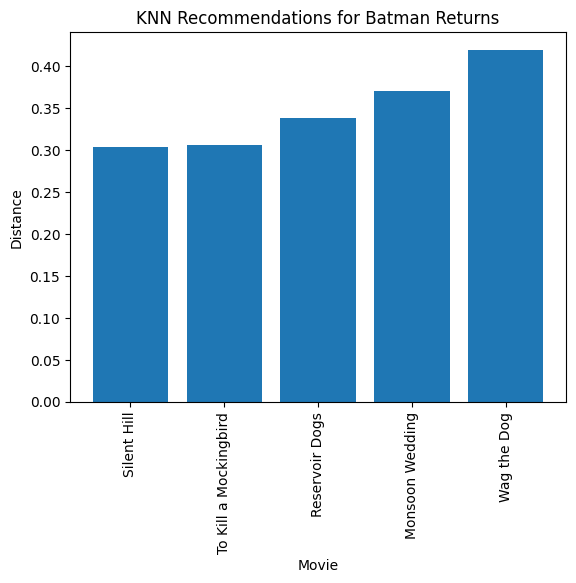

In [92]:
import matplotlib.pyplot as plt

# Get the names of the recommended movies
recommendations = [knn_df.index[indices.flatten()[i]] for i in range(1, len(distances.flatten()))]

# Create a bar chart of the recommended movies and their distances
plt.bar(recommendations, distances.flatten()[1:])
plt.xlabel('Movie')
plt.ylabel('Distance')
plt.title('KNN Recommendations for {}'.format(knn_df.index[query_index]))
plt.xticks(rotation=90)
plt.show()


We can retrieve the corresponding association rules generated by the Apriori algorithm for a particular movie and sort them in descending order of lift, which measures the strength of association between the movie and other items in the dataset.

In [93]:
all_antecedents = [list(x) for x in rules['antecedents'].values]
desired_indices = [i for i in range(len(all_antecedents)) if len(all_antecedents[i])==1 and all_antecedents[i][0]=='Batman Returns']
recommendations_apriori=rules.iloc[desired_indices,].sort_values(by=['lift'],ascending=False)
recommendations_apriori.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


Filtering the first 5 recommendations

In [94]:
apriori_recommendations_list = [list(x) for x in recommendations_apriori['consequents'].values]

print("Apriori Recommendations for movie: Batman Returns\n")
for i in range(min(5, len(apriori_recommendations_list))):
    print("{0}: {1} with lift of {2}".format(i+1,apriori_recommendations_list[i],recommendations_apriori.iloc[i,6]))



Apriori Recommendations for movie: Batman Returns



Single movie recommendations

In [96]:
recommendations_apriori_single = recommendations_apriori.iloc[[x for x in range(len(apriori_recommendations_list)) if len(apriori_recommendations_list[x])==1],]
apriori_single_recommendations_list = [list(x) for x in recommendations_apriori_single['consequents'].values]
print("Apriori single-movie Recommendations for movie: Batman Returns\n")
for i in range(min(5, len(apriori_recommendations_list))):    print("{0}: {1}, with lift of {2}".format(i+1,apriori_single_recommendations_list[i][0],recommendations_apriori_single.iloc[i,6]))

Apriori single-movie Recommendations for movie: Batman Returns

